#**CLASSIFICATION** : ENTITES NOMMEES-TRUE_FALSE vs OTHER :

**Membres:** Hadjoudja Bachir (21811363), Zeggar Rym (21909615), Bendahmane Rania (21811387), Labiad Youcef (21710780).

In [ ]:
#les imports utilisés dans ce notebook 
import sys
from numpy import vstack
import pandas as pd
from pandas import read_csv
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from torch.utils.data import random_split
from torch import Tensor
from torch.nn import Linear
from torch.nn import ReLU
from torch.nn import Sigmoid
from torch.nn import Module
from torch.optim import SGD
from torch.nn import BCELoss
from torch.nn.init import kaiming_uniform_
from torch.nn.init import xavier_uniform_
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from pandas import read_csv
from sklearn.feature_extraction.text import TfidfVectorizer
from  sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import pickle
import string

import nltk
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer 
from nltk.corpus import stopwords
from nltk import word_tokenize
from sklearn.pipeline import Pipeline
import spacy

import sklearn
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier




# Importation des différentes librairies utiles pour le notebook
#Sickit learn met régulièrement à jour des versions et 
#indique des futurs warnings. 
#ces deux lignes permettent de ne pas les afficher.
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sys
import pandas as pd
import numpy as np 
import sklearn
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
#Sickit learn met régulièrement à jour des versions et indique des futurs warnings. 
#ces deux lignes permettent de ne pas les afficher.
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
from sklearn.metrics._plot.confusion_matrix import ConfusionMatrixDisplay
from sklearn import metrics
from sklearn.metrics import confusion_matrix , ConfusionMatrixDisplay
from sklearn.metrics import classification_report

autorisation

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


chemin spécifique Google Drive

In [ ]:
my_local_drive='/content/gdrive/My Drive/Colab Notebooks'
# Ajout du path pour les librairies, fonctions et données
sys.path.append(my_local_drive)
# Se positionner sur le répertoire associé
%cd $my_local_drive
%ls

%pwd

/content/gdrive/My Drive/Colab Notebooks
 bonFakeNEWS4.ipynb
'BON_TRUE FALSE_vs_OTHER_entités_nommées.ipynb'
'Copie de FakeNEWS.ipynb'
'Copie de True_False_Other_Mixture.ipynb'
'Copie de TRUE FALSE_vs_OTHER_entités_nommées.ipynb'
'Copie de  Vrai_Faux._entites_marche_bien.ipynb'
 FakeNewsLastVersion.ipynb
 ml_entiteesNommeesTest.ipynb
'Traitement sémantique'/
 True_False_Other_Mixture_final.ipynb
 Untitled0.ipynb
 version2ml_entiteesNommeesTest.ipynb
'VRAI FAUX OTHER MIXTURE_avec_entites_nommees.ipynb'


'/content/gdrive/My Drive/Colab Notebooks'

La fonction qui sera utilisée pour les prétraitements: MyCleanText 
* Mettre le texte en minuscule
* Se débarasser des stopwords
* Se débarasser des nombres
* Stemmatisation
* Lemmatisation ..

La fonction MyshowAllScores prend le y_test et le y_predict, affiche l'accuracy et le classification report avec la matrice de confusion.

In [ ]:
#...................................................Fonction MyCleanText .............................................................................
# mettre en minuscule
#enlever les stopwords
#se debarasser des nombres
#stemmatisation
#lemmatisation 
#......................................................................................................................................................


nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')
#liste des stopwords en anglais
stop_words = set(stopwords.words('english')) 

def MyCleanText(X,
                lowercase=False, #mettre en minuscule
                removestopwords=False, #supprimer les stopwords
                removedigit=False, #supprimer les nombres
                getstemmer=False, #conserver la racine des termes
                getlemmatisation=False #lemmatisation des termes
                ):
  #conversion du texte d'entrée en chaîne de caractères
    sentence=str(X)
    #suppression des caractères spéciaux
    sentence = re.sub(r'[^\w\s]',' ', sentence)
    # suppression de tous les caractères uniques
    sentence = re.sub(r'\s+[a-zA-Z]\s+', ' ', sentence)
    # substitution des espaces multiples par un seul espace
    sentence = re.sub(r'\s+', ' ', sentence, flags=re.I)

    # decoupage en mots
    tokens = word_tokenize(sentence)
    if lowercase:
          tokens = [token.lower() for token in tokens]

    # suppression ponctuation
    table = str.maketrans('', '', string.punctuation)
    words = [token.translate(table) for token in tokens]

    # suppression des tokens non alphabetique ou numerique
    words = [word for word in words if word.isalnum()]
    
    # suppression des tokens numerique
    if removedigit:
        words = [word for word in words if not word.isdigit()]

    # suppression des stopwords
    if removestopwords:
        words = [word for word in words if not word in stop_words]

    # lemmatisation
    if getlemmatisation:
        lemmatizer=WordNetLemmatizer()
        words = [lemmatizer.lemmatize(word)for word in words]
        

    # racinisation
    if getstemmer:
        ps = PorterStemmer()
        words=[ps.stem(word) for word in words]
        
    sentence= ' '.join(words)
  
    return sentence   

# fonction qui affiche le classification report et la matrice de confusion
def MyshowAllScores(y_test,y_pred):
  classes= np.unique(y_test)
  print("Accuracy : %0.3f"%(accuracy_score(y_test,y_pred)))
  print("Classification Report")
  print(classification_report(y_test,y_pred,digits=5))    
  cnf_matrix = confusion_matrix(y_test,y_pred)
  disp=ConfusionMatrixDisplay(cnf_matrix,display_labels=classes)
  disp.plot()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


La classe TextNormalizer qui contiendra la fonction MyCleanText.

Fit_transform de mon corpus propre.

In [ ]:
#..................................................Etape 1 : prétraitement du texte ...................................................................................................
#...................................................Fonction TextNormalizer  .............................................................................
#fit_transform de mon corpus propre 
#......................................................................................................................................................

from sklearn.base import BaseEstimator, TransformerMixin

class TextNormalizer(BaseEstimator, TransformerMixin):
    def __init__(self, 
                 removestopwords=False, # suppression des stopwords
                 lowercase=False,# passage en minuscule
                 removedigit=False, # supprimer les nombres  
                 getstemmer=False,# racinisation des termes 
                 getlemmatisation=False # lemmatisation des termes  
                ):
        
        self.lowercase=lowercase
        self.getstemmer=getstemmer
        self.removestopwords=removestopwords
        self.getlemmatisation=getlemmatisation
        self.removedigit=removedigit

    def transform(self, X, **transform_params):
        # Nettoyage du texte
        X=X.copy() # pour conserver le fichier d'origine
        return [MyCleanText(text,lowercase=self.lowercase,
                            getstemmer=self.getstemmer,
                            removestopwords=self.removestopwords,
                            getlemmatisation=self.getlemmatisation,
                            removedigit=self.removedigit) for text in X]

    def fit(self, X, y=None, **fit_params):
        return self
    
    def fit_transform(self, X, y=None, **fit_params):
        return self.fit(X).transform(X)

    def get_params(self, deep=True):
        return {
            'lowercase':self.lowercase,
            'getstemmer':self.getstemmer,
            'removestopwords':self.removestopwords,
            'getlemmatisation':self.getlemmatisation,
            'removedigit':self.removedigit
        }    
    
    def set_params (self, **parameters):
        for parameter, value in parameters.items():
            setattr(self,parameter,value)
        return self    


##**1ere classification :  True/False VS Mixture/OTHER**

###**Etape 1 : Préparer les données**
* Charger et préparer les données à partir  des 2 fichiers csv
* Affichages pour tester si cela a bien été fait
* Récupérer que les lignes où on a TRUE FALSE ou bien OTHER
* Créer une colonne regrouped qui à partir de rating regarde si on a True ou False on met TRUE/FALSE sinon OTHER


In [ ]:
#Ici je cherche à séléctionner que les labels TRUE/FALSE et OTHER, donc les LIGNES qui contiennent au rating TRUE,FALSE et OTHER uniquement, le reste on enlève

dftrain = pd.read_csv("/content/gdrive/MyDrive/projet_ML/newsTrain2.csv", names=['id','text','title','rating'], header=0,sep=',', encoding='utf8')
dftrain.reset_index(drop = True, inplace = True)

dftrain2 = pd.read_csv("/content/gdrive/MyDrive/projet_ML/newsTrain - newsTrain.csv", names=['id','text','title','rating'], header=0,sep=',', encoding='utf8')
dftrain2.reset_index(drop = True, inplace = True)


# concaténer les deux dataframes en ajoutant les lignes du deuxième à la fin du premier
dftrain = pd.concat([dftrain, dftrain2], ignore_index=True)
dftrain = dftrain.loc[dftrain['rating'].isin(['TRUE','FALSE', 'other'])]

#On crée une colonne regroupe qui va mettre dans les lignes là où a true ou bien false la valeur TRUE/FALSE et OTHER ça laisse
dftrain['regrouped'] = dftrain['rating'].apply(lambda x:'TRUE/FALSE' if x in ['TRUE', 'FALSE'] else 'OTHER')

#Quelques affichages pour aider à mieux visualiser nos données
print("Echantillon de mon dataset \n")
print(dftrain.sample(n=10))
print("\n")
print("Quelques informations importantes \n")
dftrain.info()

Echantillon de mon dataset 

            id                                               text  \
2277  ca53fa81  SHARE By of the Sun Prairie - With the economy...   
727   b9ccbcb4  Though health officials have warned Americans ...   
212   4ce1af1d  Martin Gugino is a 75-year-old professional ag...   
565   8a9e86f3  Regulation promotes self-sufficiency and immig...   
536   9d3ac1f0  Three in four labour wards have no consultants...   
242   26898e5b  Joe Biden’s Inauguration has been cancelled, P...   
951   347530a3  On Tuesday, radio show host John Fredricks sta...   
138   19e13d4f  Recount observers check ballots during a Milwa...   
2056  8fba8857  In a scenario straight out of “The Twilight Zo...   
1078  1c068671  Pressure on the government to help struggling ...   

                                                  title rating   regrouped  
2277  Pastor Dies After 30 Days of Fasting To Beat J...  FALSE  TRUE/FALSE  
727   New Eavesdropping Equipment Sucks All Data Off...  

Le jeu de données étant déséquilibré, on a pensé à appliquer le downsampling pour équilibrer nos données. on séléctionne des lignes aléatoirement de TRUE/FALSE de telle sorte que le nombre de lignes de TRUE/FALSE soit = au nbr de lignes de OTHER. et on mélange le DataFrame

In [ ]:
#On applique du sous-échantillonnage (downsampling) : car on a plus de FALSE (578) que des TRUE (211) 

# Séparer les classes en deux dataframes
df_false_true = dftrain[dftrain['regrouped'] == 'TRUE/FALSE']
df_other = dftrain [dftrain['regrouped'] == 'OTHER']

# Sous-échantillonner la classe majoritaire (FALSE) pour obtenir un nombre égal d'échantillons pour chaque classe
df_subsampled = df_false_true.sample(n=len(df_other), random_state=42)

# Concaténer les deux dataframes
dftrain = pd.concat([df_subsampled, df_other])

# Mélanger aléatoirement les données
dftrain = dftrain.sample(frac=1, random_state=42)

X_text=dftrain.iloc[0:,1:2]
X_title=dftrain.iloc[0:,2:3]

print("le texte est")
display(X_text)
print("le titre est")
display(X_title)

y=dftrain.iloc[0:,-1]
print("le y est")
display(y)
print("la taille de X_text est",X_text.shape)
print("la taille de y_train est " ,y.shape)
print("les valeurs de TRUE et FALSE maintenant sont " ,y.value_counts())

le texte est


,text
947,War-torn eastern regions of Ukraine have no la...
2224,"TIJUANA, Mexico — It’s the image from the unfo..."
1307,"Today, Congresswoman Maxine Waters D-CA, Chair..."
798,Meghan Markle will use the furore over her int...
320,Further proof that Democrats are the greatest ...
...,...
1160,The scale of Antarctica is startling. Miles of...
570,Coronavirus may be sexually transmitted and ca...
1200,Like what? Helen Harwatt is a researcher trai...
2190,Tumeric kills cancer not patient


le titre est


,title
947,"Look No Further, The Best Doctor Strange in th..."
2224,A discussion of ‘smokers’ black lungs’ started...
1307,Democratic Lawmaker introduces bill to rename ...
798,Newton Emerson: Swiss model offers food for th...
320,Democrats Introduce Bill To ‘Euthanize Seniors...
...,...
1160,Miles of Ice Collapsing Into the Sea
570,Universal Credit leaves working families worse...
1200,If Everyone Ate Beans Instead of Beef
2190,Vermont state trooper revived with Narcan afte...


le y est


947     TRUE/FALSE
2224    TRUE/FALSE
1307    TRUE/FALSE
798          OTHER
320     TRUE/FALSE
           ...    
1160    TRUE/FALSE
570          OTHER
1200         OTHER
2190         OTHER
391     TRUE/FALSE
Name: regrouped, Length: 468, dtype: object

la taille de X_text est (468, 1)
la taille de y_train est  (468,)
les valeurs de TRUE et FALSE maintenant sont  TRUE/FALSE    234
OTHER         234
Name: regrouped, dtype: int64


**ENTITY_RECOGNITION**

Avant de classifier on applique les entités nommées, Cette fonction utilise Spacy pour extraire les entités nommées à partir d'une liste de textes et les stocke dans une liste pour être affichées avec leurs labels correspondants.

In [ ]:
from spacy import displacy

In [ ]:
nlp = spacy.load("en_core_web_sm")
texte=dftrain['text']
#Créer une liste pour stocker les entités nommées
entities = []
# Traiter chaque texte individuellement et ajouter les entités à la liste
for phrase in texte:
    phrase_str = str(phrase)  # Convertir l'élément en chaîne de caractères
    doc = nlp(phrase_str)
    for ent in doc.ents:
        entities.append((ent.text, ent.label_))


# Afficher les entités nommées
for entity in entities:
    print(entity[0], entity[1])

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
2007 DATE
Italy GPE
Britain GPE
the European Arrest Warrant ORG
EU ORG
over 5,000 CARDINAL
EU ORG
2010 DATE
European NORP
Britain GPE
EU ORG
the United Nations ORG
Nato ORG
EU ORG
Russia GPE
Ukraine GPE
the Horn of Africa LOC
British NORP
1bn ORDINAL
West Africa GPE
Europe LOC
first ORDINAL
EU ORG
Europe LOC
Norway GPE
Switzerland GPE
Europe LOC
Russia GPE
Europe LOC
EU ORG
EU ORG
thousands CARDINAL
Europe LOC
Europe LOC
Britain GPE
British NORP
Outers PRODUCT
Europe LOC
EU ORG
790,000 CARDINAL
UK GPE
2030 DATE
58bn MONEY
Government ORG
Britain GPE
Europe LOC
Europe LOC
Europe LOC
Britain GPE
Europe LOC
Europe LOC
British NORP
Straw ORG
Britain Stronger ORG
Europe LOC
Coronavirus ORG
Last week DATE
the days DATE
Sanders ORG
two CARDINAL
Wednesday DATE
Vermont GPE
Biden PERSON
Sanders ORG
Faiz Shakir PERSON
Jeff Weaver PERSON
Biden PERSON
two CARDINAL
Anita Dunn PERSON
Ron Klain PERSON
Vermont GPE
last week DA

Exemple d'affichage graphique des entités nommées d'un texte

In [ ]:
#displacy.render(nlp(textenlp),style="ent", jupyter=True)
nlp = spacy.load("en_core_web_sm")
text = dftrain['text'].iloc[3]  # Choisir le premier texte comme exemple
doc = nlp(text)

displacy.render(doc, style="ent", jupyter=True)

Cette fonction a pour but d'ajouter le type d'entité de chaque token détecté à coté de chaque entité détéctée dans le texte qu'elle prend en entrée, et retourne le texte modifié avec les informations ajoutées sur les entités nommées.

In [ ]:
def add_entity_name(text):
    if text is None or pd.isna(text):
        return ""

    doc = nlp(text)
    # Créer une liste pour stocker les nouveaux tokens
    nouveaux_tokens = []

    # Parcourir les tokens et ajouter des informations selon le type d'entité
    for token in doc:
        if token.ent_type_:
            # Ajouter le nom de l'entité (type d'entité) à côté de l'entité
            nouveaux_tokens.append(f"{token.text} ({token.ent_type_})")
        else:
            nouveaux_tokens.append(token.text)

    # Reconstruire le texte avec les informations ajoutées
    nouveau_texte = " ".join(nouveaux_tokens)
    return nouveau_texte

Application de la fonction précédente à la colonne "title" ainsi que la colonne "texte avec la méthode apply

In [ ]:
# Assurez-vous que les colonnes "text" et "titre" contiennent des chaînes de caractères
dftrain['text'] = dftrain['text'].astype(str)
dftrain['title'] = dftrain['title'].astype(str)

# Appliquer la fonction à la colonne "title"
dftrain['text'] = dftrain['text'].apply(add_entity_name)
dftrain['title'] = dftrain['title'].apply(add_entity_name)

print(dftrain['text'])
print(dftrain['title'])

947     War - torn eastern regions of Ukraine (GPE) ha...
2224    TIJUANA , Mexico (GPE) — It ’s the image from ...
1307    Today , Congresswoman Maxine Waters D - CA , C...
798     Meghan (PERSON) Markle (PERSON) will use the f...
320     Further proof that Democrats (NORP) are the gr...
                              ...                        
1160    The scale of Antarctica (LOC) is startling . M...
570     Coronavirus (ORG) may be sexually transmitted ...
1200    Like what ?   Helen (PERSON) Harwatt (PERSON) ...
2190                     Tumeric kills cancer not patient
391     WASHINGTON (GPE) , DC – The Pentagon (ORG) has...
Name: text, Length: 468, dtype: object
947     Look No Further , The Best Doctor Strange in t...
2224    A discussion of ‘ smokers ’ black lungs ’ star...
1307    Democratic (NORP) Lawmaker introduces bill to ...
798     Newton (GPE) Emerson : Swiss model offers food...
320     Democrats (NORP) Introduce Bill (PERSON) To (P...
                              ...

On scinde les données de la colonne "title" en jeu d'apprentissage et jeu de test

In [ ]:

X=dftrain.iloc[0:, 1:4]
print(X)

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size = 0.2, random_state=10)
print("X_train is",X_train)
print("y_train is",y_train)
print("X_test is",X_test)
print("y_test is",y_test)


                                                   text  \
947   War - torn eastern regions of Ukraine (GPE) ha...   
2224  TIJUANA , Mexico (GPE) — It ’s the image from ...   
1307  Today , Congresswoman Maxine Waters D - CA , C...   
798   Meghan (PERSON) Markle (PERSON) will use the f...   
320   Further proof that Democrats (NORP) are the gr...   
...                                                 ...   
1160  The scale of Antarctica (LOC) is startling . M...   
570   Coronavirus (ORG) may be sexually transmitted ...   
1200  Like what ?   Helen (PERSON) Harwatt (PERSON) ...   
2190                   Tumeric kills cancer not patient   
391   WASHINGTON (GPE) , DC – The Pentagon (ORG) has...   

                                                  title rating  
947   Look No Further , The Best Doctor Strange in t...  FALSE  
2224  A discussion of ‘ smokers ’ black lungs ’ star...   TRUE  
1307  Democratic (NORP) Lawmaker introduces bill to ...  FALSE  
798   Newton (GPE) Emerson : Sw

### **Etape 2 : Classification selon la colonne TEXTE**



On met la colonne "texte" dans les variables X_train et X_test

In [ ]:
X_train_text=X_train['text']
X_train_text.reset_index(drop = True, inplace = True)
X_test_text=X_test['text']
X_test_text.reset_index(drop = True, inplace = True)

Ici, c'est une étape importante, on va tester différents classifieurs, pour chacun des classifieurs, on va appliquer le prétraitement + Vectorisation TfIdf, et on applique une cross_val_score avec un Kfold de 10 fois, par la suite on stocke dans une liste all_results la moyenne des accuracy + l'écart type et on la trie par ordre décroissant de moyenne d'accuracy et d'écart type. on remarque que les 2 meilleurs sont SVM et RF qu'on va séléctionner pour leur appliquer le GridSearch sur les paramètres des prétraitements + leurs hyperparamètres pour pouvoir choisir le meilleur.

In [ ]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
import time

np.random.seed(42)  # Set the random seed for NumPy

score = 'accuracy'
seed = 7        
allresults = []
results = []
names = []


# Liste des modèles à tester
models = [
    ('MultinomialNB', MultinomialNB()),
    ('LogisticRegression', LogisticRegression(random_state=42)),
    ('KNN', KNeighborsClassifier()),
    ('CART', DecisionTreeClassifier(random_state=42)),
    ('RF', RandomForestClassifier(random_state=42)),
    ('SVM', SVC(random_state=42))
]


# Création d'un pipeline pour chaque modèle
pipelines = []
for name,model in models:
    pipeline = Pipeline([
        ('normalize', TextNormalizer()),
        ('tfidf', TfidfVectorizer()),
        (name,model)
    ])
    pipelines.append((name,pipeline))

all_results=[]
scores=[]
names=[]
for p in pipelines:
    print(p[1])
    # cross validation en 10 fois
    kfold = KFold(n_splits=10,random_state=seed,shuffle=True)
    start_time = time.time()
    # application de la classification
    cv_results = cross_val_score(p[1],X_train_text,y_train, cv=kfold, scoring=score)
    scores.append(cv_results)
    names.append(p[0])
    all_results.append((p[0],cv_results.mean(),cv_results.std()))
    end_time = time.time()


print("all resultats", all_results)

all_results = sorted(all_results, key=lambda x: (-x[1], -x[2]))
print("all resultats", all_results)

Pipeline(steps=[('normalize', TextNormalizer()), ('tfidf', TfidfVectorizer()),
                ('MultinomialNB', MultinomialNB())])
Pipeline(steps=[('normalize', TextNormalizer()), ('tfidf', TfidfVectorizer()),
                ('LogisticRegression', LogisticRegression(random_state=42))])
Pipeline(steps=[('normalize', TextNormalizer()), ('tfidf', TfidfVectorizer()),
                ('KNN', KNeighborsClassifier())])
Pipeline(steps=[('normalize', TextNormalizer()), ('tfidf', TfidfVectorizer()),
                ('CART', DecisionTreeClassifier(random_state=42))])
Pipeline(steps=[('normalize', TextNormalizer()), ('tfidf', TfidfVectorizer()),
                ('RF', RandomForestClassifier(random_state=42))])
Pipeline(steps=[('normalize', TextNormalizer()), ('tfidf', TfidfVectorizer()),
                ('SVM', SVC(random_state=42))])
all resultats [('MultinomialNB', 0.7166429587482218, 0.0966310908000528), ('LogisticRegression', 0.8179943100995732, 0.06122136042831569), ('KNN', 0.66266002844950

On affiche les boites à moustache pour mieux visualiser les résultats

[Text(1, 0, 'MultinomialNB'),
 Text(2, 0, 'LogisticRegression'),
 Text(3, 0, 'KNN'),
 Text(4, 0, 'CART'),
 Text(5, 0, 'RF'),
 Text(6, 0, 'SVM')]

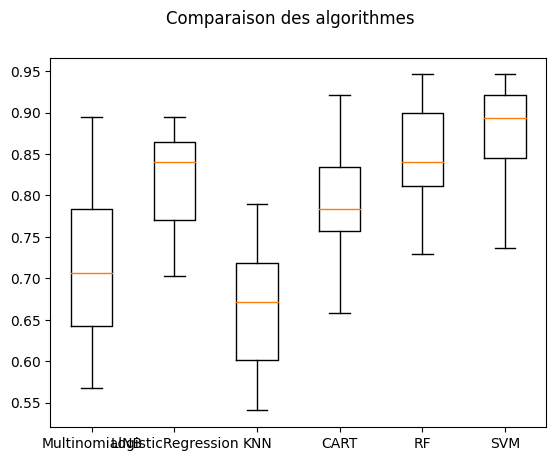

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure()
fig.suptitle('Comparaison des algorithmes')
ax = fig.add_subplot(111)
plt.boxplot(scores)
ax.set_xticklabels(names)

#### Choisir les meilleurs paramètres pour SVM, RF et LR : 



On a un pipeline pour chaque prétraitement différent, on essaye pas mal (miniscule, lemmatisation, miniscule + lemmatisation..) et on stocke le fit_transorm de nos X_train, X_test sur les pipelines dans des listes qui vont contenir tous les fit_transform des pipelines pour chaque classifieur, par la suite on parcourt ces listes là, on itère dessus, et chaque élement de la liste (train) va passer par le GridSearch et puis on predict sur son corresapondant dans liste (test).

grid search fait
Fitting 5 folds for each of 18 candidates, totalling 90 fits
meilleur score 0.872 

meilleur estimateur SVC(C=2, random_state=42) 

Accuracy : 0.915
Classification Report
              precision    recall  f1-score   support

       OTHER    0.86667   0.95122   0.90698        41
  TRUE/FALSE    0.95918   0.88679   0.92157        53

    accuracy                        0.91489        94
   macro avg    0.91293   0.91901   0.91427        94
weighted avg    0.91883   0.91489   0.91520        94

Ensemble des meilleurs paramètres :
	C: 2
	gamma: 'scale'
	kernel: 'rbf'
grid search fait
Fitting 5 folds for each of 18 candidates, totalling 90 fits
meilleur score 0.874 

meilleur estimateur SVC(C=2, random_state=42) 

Accuracy : 0.936
Classification Report
              precision    recall  f1-score   support

       OTHER    0.90698   0.95122   0.92857        41
  TRUE/FALSE    0.96078   0.92453   0.94231        53

    accuracy                        0.93617        94
   mac

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
10 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Solve

meilleur score 0.848 

meilleur estimateur LogisticRegression(penalty='none', random_state=42) 

Accuracy : 0.862
Classification Report
              precision    recall  f1-score   support

       OTHER    0.78000   0.95122   0.85714        41
  TRUE/FALSE    0.95455   0.79245   0.86598        53

    accuracy                        0.86170        94
   macro avg    0.86727   0.87184   0.86156        94
weighted avg    0.87841   0.86170   0.86213        94

Ensemble des meilleurs paramètres :
	penalty: 'none'
	C: 1.0
	fit_intercept: True
	solver: 'lbfgs'
	max_iter: 100
grid search fait
Fitting 5 folds for each of 20 candidates, totalling 100 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
10 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Solve

meilleur score 0.861 

meilleur estimateur LogisticRegression(C=10, random_state=42) 

Accuracy : 0.840
Classification Report
              precision    recall  f1-score   support

       OTHER    0.75000   0.95122   0.83871        41
  TRUE/FALSE    0.95238   0.75472   0.84211        53

    accuracy                        0.84043        94
   macro avg    0.85119   0.85297   0.84041        94
weighted avg    0.86411   0.84043   0.84062        94

Ensemble des meilleurs paramètres :
	penalty: 'l2'
	C: 10
	fit_intercept: True
	solver: 'lbfgs'
	max_iter: 100
grid search fait
Fitting 5 folds for each of 20 candidates, totalling 100 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
10 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Solve

meilleur score 0.880 

meilleur estimateur LogisticRegression(penalty='none', random_state=42) 

Accuracy : 0.851
Classification Report
              precision    recall  f1-score   support

       OTHER    0.76471   0.95122   0.84783        41
  TRUE/FALSE    0.95349   0.77358   0.85417        53

    accuracy                        0.85106        94
   macro avg    0.85910   0.86240   0.85100        94
weighted avg    0.87115   0.85106   0.85140        94

Ensemble des meilleurs paramètres :
	penalty: 'none'
	C: 1.0
	fit_intercept: True
	solver: 'lbfgs'
	max_iter: 100
grid search fait
Fitting 5 folds for each of 20 candidates, totalling 100 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
10 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Solve

meilleur score 0.858 

meilleur estimateur LogisticRegression(penalty='none', random_state=42) 

Accuracy : 0.872
Classification Report
              precision    recall  f1-score   support

       OTHER    0.79592   0.95122   0.86667        41
  TRUE/FALSE    0.95556   0.81132   0.87755        53

    accuracy                        0.87234        94
   macro avg    0.87574   0.88127   0.87211        94
weighted avg    0.88593   0.87234   0.87280        94

Ensemble des meilleurs paramètres :
	penalty: 'none'
	C: 1.0
	fit_intercept: True
	solver: 'lbfgs'
	max_iter: 100
grid search fait
Fitting 5 folds for each of 8 candidates, totalling 40 fits
meilleur score 0.845 

meilleur estimateur RandomForestClassifier(n_estimators=200, random_state=42) 

Accuracy : 0.936
Classification Report
              precision    recall  f1-score   support

       OTHER    0.90698   0.95122   0.92857        41
  TRUE/FALSE    0.96078   0.92453   0.94231        53

    accuracy                        0.93

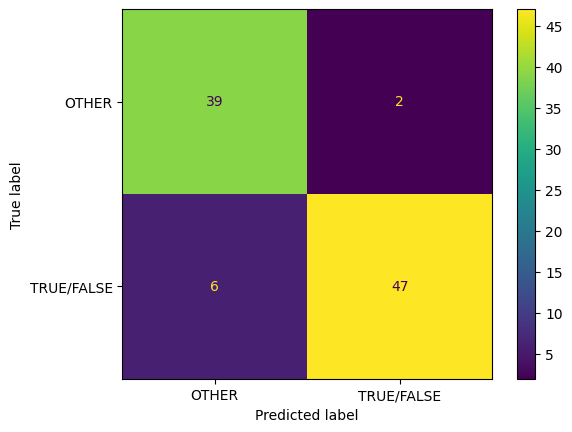

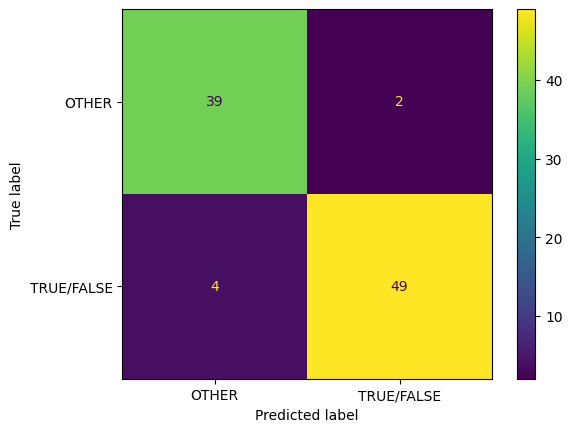

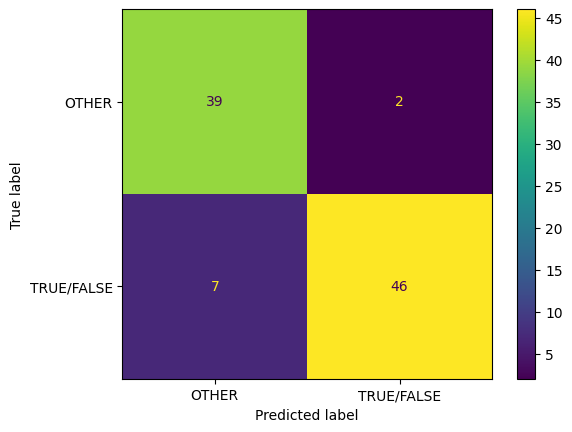

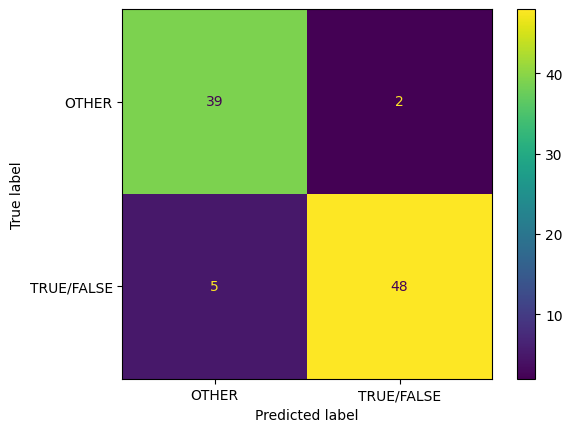

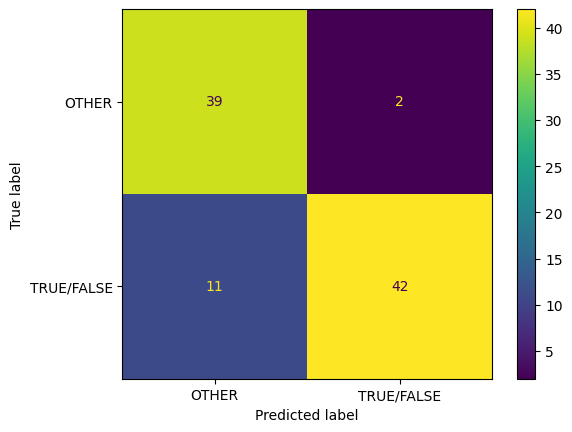

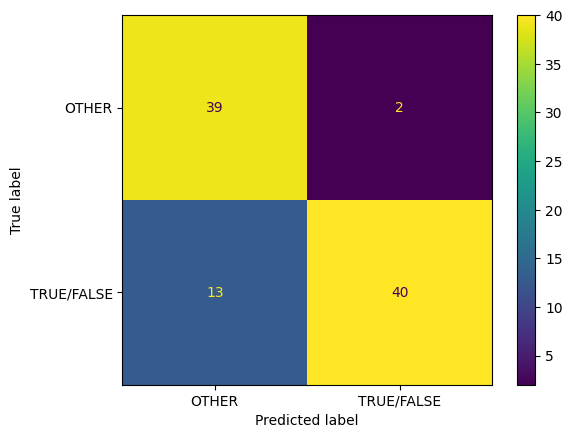

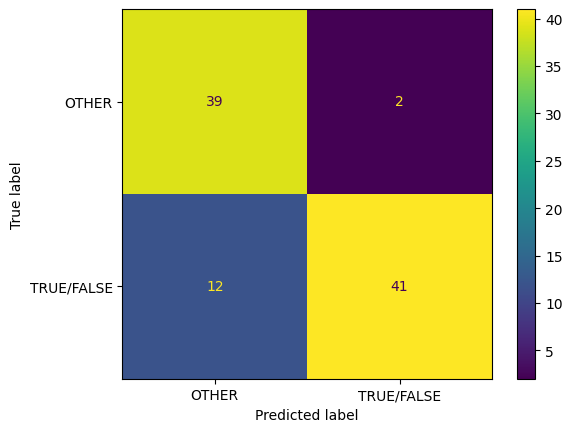

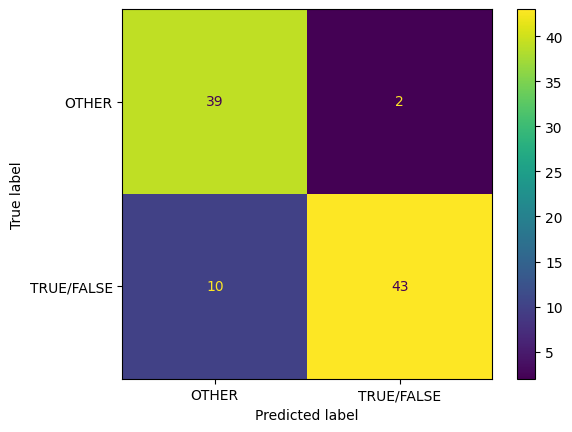

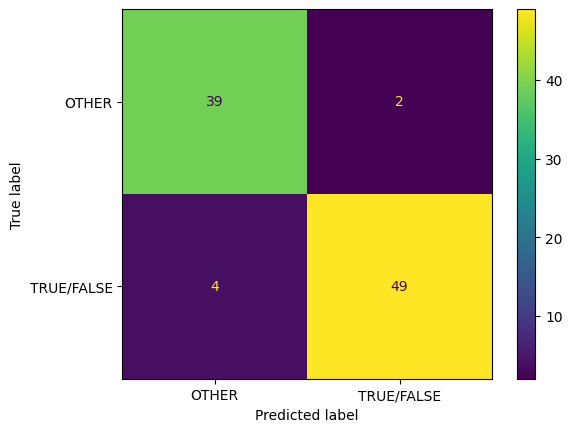

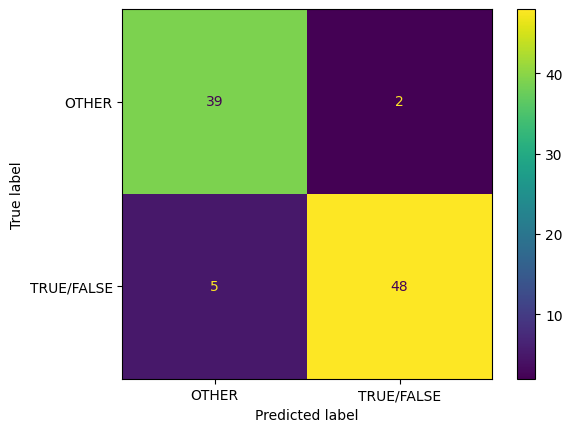

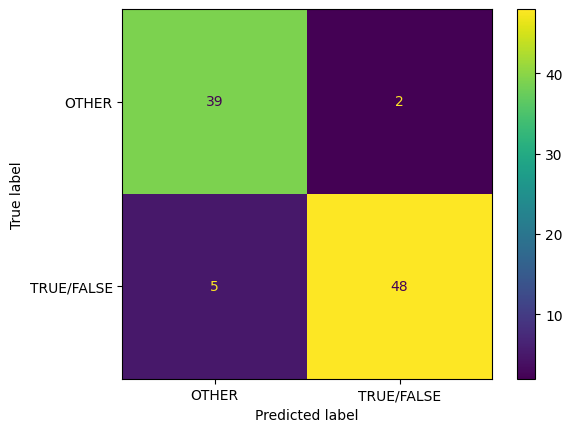

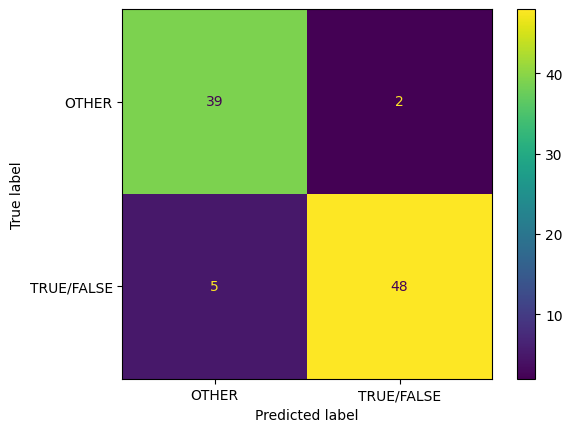

In [ ]:
from sklearn.model_selection import GridSearchCV

np.random.seed(42)  # Set the random seed for NumPy

from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from tabulate import tabulate


# pipeline de l'utilisation de TfidfVectorizer avec differents pre-traitements
TFIDF_brut = Pipeline ([('cleaner', TextNormalizer()), 
                    ('tfidf_vectorizer', TfidfVectorizer(lowercase=False))])

TFIDF_lowcase = Pipeline([('cleaner', TextNormalizer(removestopwords=False,lowercase=True,
                                               getstemmer=False,removedigit=False)), 
                    ('tfidf_vectorizer', TfidfVectorizer(lowercase=False))])
TFIDF_lowStop = Pipeline([('cleaner', TextNormalizer(removestopwords=True,lowercase=True,
                                               getstemmer=False,removedigit=False)), 
                    ('tfidf_vectorizer', TfidfVectorizer(lowercase=False))])

TFIDF_lowStopstem = Pipeline([('cleaner', TextNormalizer(removestopwords=True,lowercase=True,
                                               getstemmer=True,removedigit=False)), 
                    ('tfidf_vectorizer', TfidfVectorizer(lowercase=False))])


# Liste de tous les modeles à tester
all_models = [
    ("TFIDF_lowcase", TFIDF_lowcase),
    ("TFIDF_lowStop", TFIDF_lowStop),
    ("TFIDF_lowStopstem",TFIDF_lowStopstem),
    ("TFIDF_brut", TFIDF_brut)
]

X_train_text_SVC = []
X_test_text_SVC = []

X_train_text_RandomForestClassifier = []
X_test_text_RandomForestClassifier = []

X_train_text_LogisticRegression = []
X_test_text_LogisticRegression = []

for name, pipeline in all_models :
    X_train_text_SVC.append(pipeline.fit_transform(X_train_text).toarray())
    X_test_text_SVC.append(pipeline.transform(X_test_text).toarray())
    X_train_text_RandomForestClassifier.append(pipeline.fit_transform(X_train_text).toarray())
    X_test_text_RandomForestClassifier.append(pipeline.transform(X_test_text).toarray())
    X_train_text_LogisticRegression.append(pipeline.fit_transform(X_train_text).toarray())
    X_test_text_LogisticRegression.append(pipeline.transform(X_test_text).toarray())


models = {
    'SVC': SVC(random_state=42),
    'LogisticRegression' : LogisticRegression(random_state=42),
    'RandomForestClassifier': RandomForestClassifier(random_state=42)
}
    

params = {'SVC': [{'C': [0.001, 0.01, 0.1, 1,2,5,7,10]},
             {'gamma': [0.001, 0.01, 0.1,0.2,0.3,0.5,0.7,1]},
             {'kernel': ['linear', 'rbf']}],
    'RandomForestClassifier': [{'n_estimators': [10, 50, 100, 200, 300]},
                              {'max_features': ['auto', 'sqrt', 'log2']}],
    'LogisticRegression': [{'penalty': ['l1', 'l2','elasticnet', 'none']},
                              {'C': [0.001, 0.01, 0.1, 1, 10, 100]},
                              {'fit_intercept': [True,False]},
                              {'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']},
                              {'max_iter': [100, 1000, 10000]}]
}

for model_name, model in models.items():
    score='accuracy'
    X_train_text = eval('X_train_text_' + model_name)
    X_test_text = eval('X_test_text_' + model_name)
    for i in range (len(X_train_text)):
      grid_search = GridSearchCV(model, params[model_name], n_jobs=-1,  verbose=1,scoring=score)
      print("grid search fait")
      grid_search.fit(X_train_text[i],y_train)
      print ('meilleur score %0.3f'%(grid_search.best_score_),'\n')
      print ('meilleur estimateur',grid_search.best_estimator_,'\n')
      y_pred = grid_search.predict(X_test_text[i])
      MyshowAllScores(y_test,y_pred)
      
      print("Ensemble des meilleurs paramètres :")
      best_parameters = grid_search.best_estimator_.get_params()
      for param_dict in params[model_name]:
        for param_name, param_value in param_dict.items():
            print("\t%s: %r" % (param_name, best_parameters[param_name]))

###**Etape 3 : Classification selon la colonne TITRE**

X_train_title prend la valeur de la colonne title dans le jeu d'entrainement et X_test_title prend la valeur de la colonne title dans le jeu de test

In [ ]:
X_train_title = X_train['title']
X_train_title.reset_index(drop = True, inplace = True)
X_test_title = X_test['title']
X_test_title.reset_index(drop = True, inplace = True)

Ici, c'est une étape importante, on va tester différents classifieurs, pour chacun des classifieurs, on va appliquer le prétraitement + Vectorisation TfIdf, et on applique une cross_val_score avec un Kfold de 10 fois, par la suite on stocke dans une liste all_results la moyenne des accuracy + l'écart type et on la trie par ordre décroissant de moyenne d'accuracy et d'écart type. on remarque que les 2 meilleurs sont SVM et RF qu'on va séléctionner pour leur appliquer le GridSearch sur les paramètres des prétraitements + leurs hyperparamètres pour pouvoir choisir le meilleur.

In [ ]:


score = 'accuracy'
seed = 7        
allresults = []
results = []
names = []


# Liste des modèles à tester
models = [
    ('MultinomialNB', MultinomialNB()),
    ('LogisticRegression', LogisticRegression(random_state=42)),
    ('KNN', KNeighborsClassifier()),
    ('CART', DecisionTreeClassifier(random_state=42)),
    ('RF', RandomForestClassifier(random_state=42)),
    ('SVM', SVC(random_state=42))
]


# Création d'un pipeline pour chaque modèle
pipelines = []
for name,model in models:
    pipeline = Pipeline([
        ('normalize', TextNormalizer()),
        ('tfidf', TfidfVectorizer()),
        (name,model)
    ])
    pipelines.append((name,pipeline))

all_results=[]
scores=[]
names=[]
for p in pipelines:
    print(p[1])
    # cross validation en 10 fois
    kfold = KFold(n_splits=10,random_state=seed,shuffle=True)
    # application de la classification
    cv_results = cross_val_score(p[1],X_train_title,y_train, cv=kfold, scoring=score)
    scores.append(cv_results)
    names.append(p[0])
    all_results.append((p[0],cv_results.mean(),cv_results.std()))
    


all_results = sorted(all_results, key=lambda x: (-x[1], -x[2]))
print("all resultats", all_results)

Pipeline(steps=[('normalize', TextNormalizer()), ('tfidf', TfidfVectorizer()),
                ('MultinomialNB', MultinomialNB())])
Pipeline(steps=[('normalize', TextNormalizer()), ('tfidf', TfidfVectorizer()),
                ('LogisticRegression', LogisticRegression(random_state=42))])
Pipeline(steps=[('normalize', TextNormalizer()), ('tfidf', TfidfVectorizer()),
                ('KNN', KNeighborsClassifier())])
Pipeline(steps=[('normalize', TextNormalizer()), ('tfidf', TfidfVectorizer()),
                ('CART', DecisionTreeClassifier(random_state=42))])
Pipeline(steps=[('normalize', TextNormalizer()), ('tfidf', TfidfVectorizer()),
                ('RF', RandomForestClassifier(random_state=42))])
Pipeline(steps=[('normalize', TextNormalizer()), ('tfidf', TfidfVectorizer()),
                ('SVM', SVC(random_state=42))])
all resultats [('SVM', 0.8958748221906117, 0.04656971470072443), ('RF', 0.8105263157894738, 0.042092045520615184), ('LogisticRegression', 0.8076102418207682, 0.052

On affiche les boites à moustache pour mieux visualiser les résultats

[Text(1, 0, 'MultinomialNB'),
 Text(2, 0, 'LogisticRegression'),
 Text(3, 0, 'KNN'),
 Text(4, 0, 'CART'),
 Text(5, 0, 'RF'),
 Text(6, 0, 'SVM')]

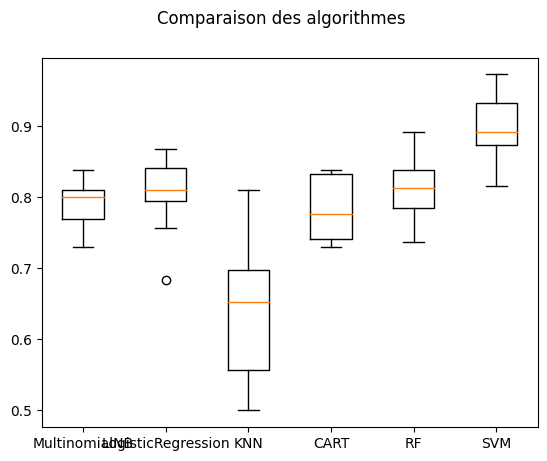

In [ ]:
fig = plt.figure()
fig.suptitle('Comparaison des algorithmes')
ax = fig.add_subplot(111)
plt.boxplot(scores)
ax.set_xticklabels(names)

#### Choisir les meilleurs paramètres pour SVM et RF : 


grid search fait
Fitting 5 folds for each of 18 candidates, totalling 90 fits
meilleur score 0.880 

meilleur estimateur SVC(C=1, random_state=42) 

Accuracy : 0.968
Classification Report
              precision    recall  f1-score   support

       OTHER    0.97500   0.95122   0.96296        41
  TRUE/FALSE    0.96296   0.98113   0.97196        53

    accuracy                        0.96809        94
   macro avg    0.96898   0.96618   0.96746        94
weighted avg    0.96821   0.96809   0.96804        94

Ensemble des meilleurs paramètres :
	C: 1
	gamma: 'scale'
	kernel: 'rbf'
grid search fait
Fitting 5 folds for each of 18 candidates, totalling 90 fits
meilleur score 0.888 

meilleur estimateur SVC(C=1, random_state=42) 

Accuracy : 0.968
Classification Report
              precision    recall  f1-score   support

       OTHER    0.97500   0.95122   0.96296        41
  TRUE/FALSE    0.96296   0.98113   0.97196        53

    accuracy                        0.96809        94
   mac

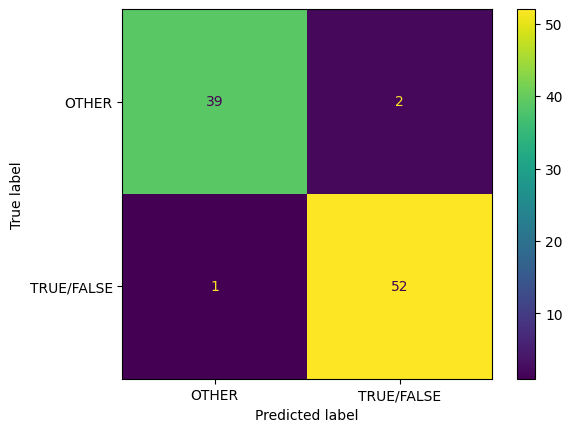

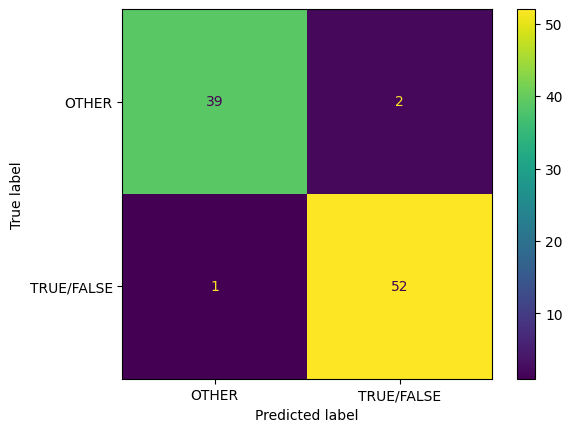

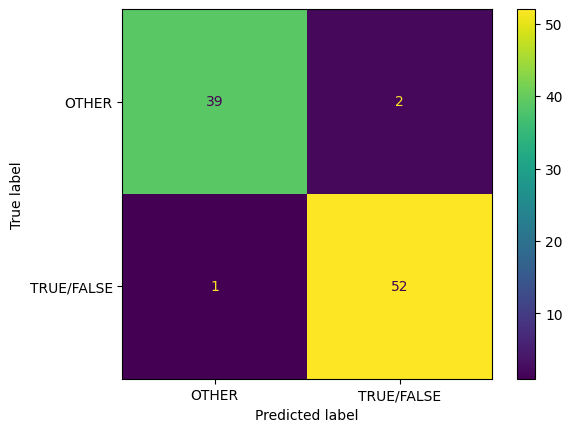

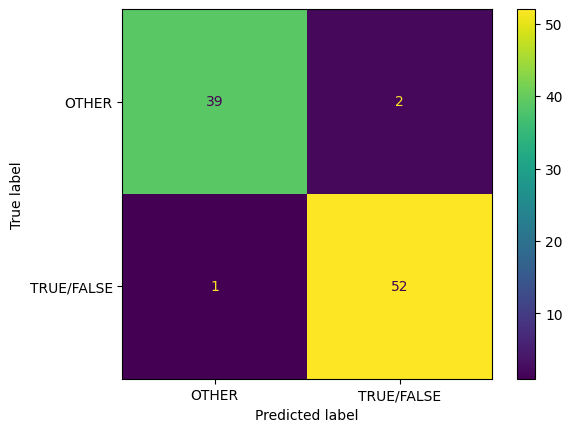

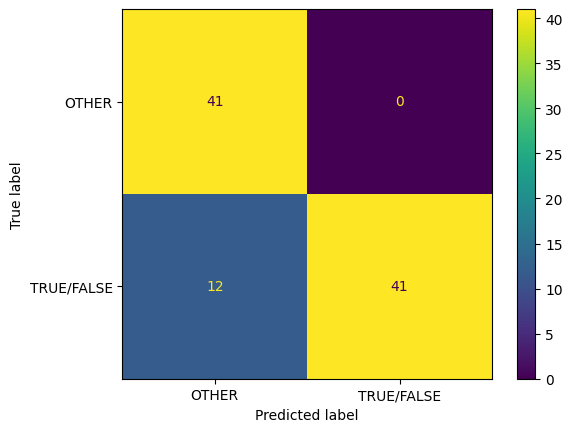

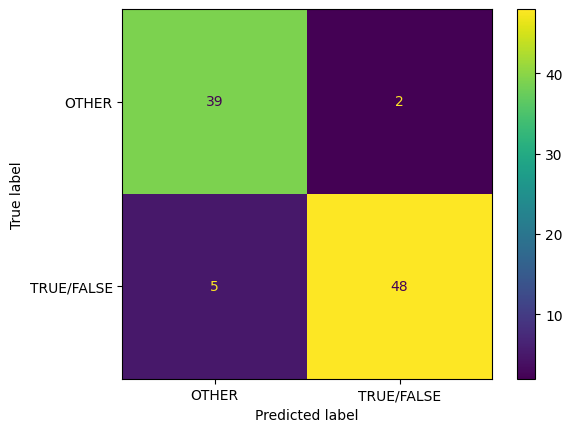

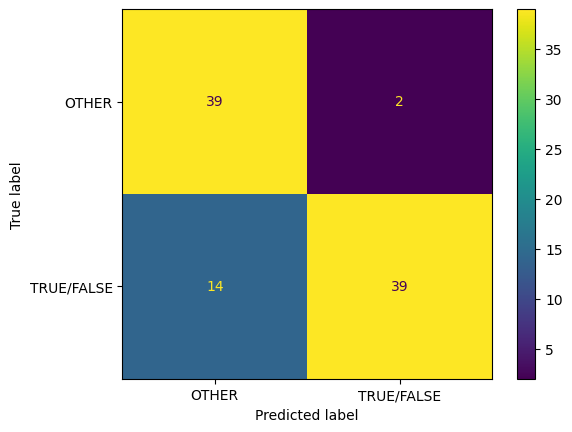

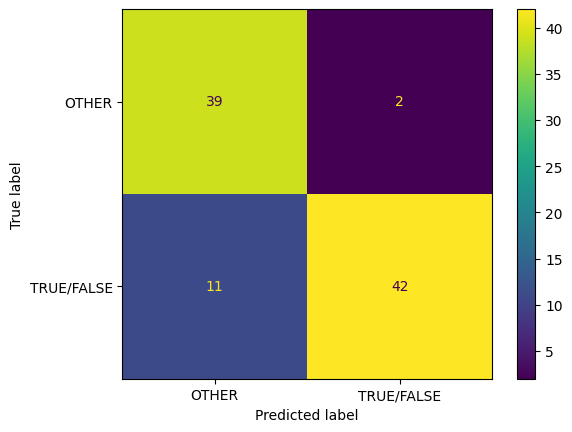

In [ ]:


# le plus simple est de faire un test sur differents pipelines.  


# pipeline de l'utilisation de TfidfVectorizer avec differents pre-traitements
TFIDF_brut = Pipeline ([('cleaner', TextNormalizer()), 
                    ('tfidf_vectorizer', TfidfVectorizer(lowercase=False))])

TFIDF_lowcase = Pipeline([('cleaner', TextNormalizer(removestopwords=False,lowercase=True,
                                               getstemmer=False,removedigit=False)), 
                    ('tfidf_vectorizer', TfidfVectorizer(lowercase=False))])
TFIDF_lowStop = Pipeline([('cleaner', TextNormalizer(removestopwords=True,lowercase=True,
                                               getstemmer=False,removedigit=False)), 
                    ('tfidf_vectorizer', TfidfVectorizer(lowercase=False))])

TFIDF_lowStopstem = Pipeline([('cleaner', TextNormalizer(removestopwords=True,lowercase=True,
                                               getstemmer=True,removedigit=False)), 
                    ('tfidf_vectorizer', TfidfVectorizer(lowercase=False))])


# Liste de tous les modeles à tester
all_models = [
    ("TFIDF_lowcase", TFIDF_lowcase),
    ("TFIDF_lowStop", TFIDF_lowStop),
    ("TFIDF_lowStopstem",TFIDF_lowStopstem),
    ("TFIDF_brut", TFIDF_brut)
]

X_train_title_SVC = []
X_test_title_SVC = []

X_train_title_RandomForestClassifier = []
X_test_title_RandomForestClassifier = []


for name, pipeline in all_models :
    X_train_title_SVC.append(pipeline.fit_transform(X_train_title).toarray())
    X_test_title_SVC.append(pipeline.transform(X_test_title).toarray())
    X_train_title_RandomForestClassifier.append(pipeline.fit_transform(X_train_title).toarray())
    X_test_title_RandomForestClassifier.append(pipeline.transform(X_test_title).toarray())


models = {
    'SVC': SVC(random_state=42),
    'RandomForestClassifier': RandomForestClassifier(random_state=42)
}
    

params = {'SVC': [{'C': [0.001, 0.01, 0.1, 1,2,5,7,10]},
             {'gamma': [0.001, 0.01, 0.1,0.2,0.3,0.5,0.7,1]},
             {'kernel': ['linear', 'rbf']}],
    'RandomForestClassifier': [{'n_estimators': [10, 50, 100, 200, 300]},
                              {'max_features': ['auto', 'sqrt', 'log2']}]
}

for model_name, model in models.items():
    score='accuracy'
    X_train_title = eval('X_train_title_' + model_name)
    X_test_title = eval('X_test_title_' + model_name)
    for i in range (len(X_train_title)):
      grid_search = GridSearchCV(model, params[model_name], n_jobs=-1,  verbose=1,scoring=score)
      print("grid search fait")
      grid_search.fit(X_train_title[i],y_train)
      print ('meilleur score %0.3f'%(grid_search.best_score_),'\n')
      print ('meilleur estimateur',grid_search.best_estimator_,'\n')
      y_pred = grid_search.predict(X_test_title[i])
      MyshowAllScores(y_test,y_pred)
      
      print("Ensemble des meilleurs paramètres :")
      best_parameters = grid_search.best_estimator_.get_params()
      for param_dict in params[model_name]:
        for param_name, param_value in param_dict.items():
            print("\t%s: %r" % (param_name, best_parameters[param_name]))

### **Etape 4 : Classification selon la colonne Text_title (concaténation de la colonne text et la colonne title) :**

On concatène les deux colonnes text et titre de note DataFrame dftrain

In [ ]:
train_text_title = X_train.apply(lambda x : '{} {}'.format(x['text'],x['title']),axis=1)
test_text_title = X_test.apply(lambda x : '{} {}'.format(x['text'],x['title']),axis=1)

X_train['text_title'] = train_text_title
X_train_text_title = X_train['text_title']
X_train_text_title.reset_index(drop = True, inplace = True)

X_test['text_title'] = test_text_title
X_test_text_title = X_test['text_title']
X_test_text_title.reset_index(drop = True, inplace = True)

print("le texte et titre du train sont")
display(X_train_text_title)

print("le texte et titre du test sont")
display(X_test_text_title)

Ici, c'est une étape importante, on va tester différents classifieurs, pour chacun des classifieurs, on va appliquer le prétraitement + Vectorisation TfIdf, et on applique une cross_val_score avec un Kfold de 10 fois, par la suite on stocke dans une liste all_results la moyenne des accuracy + l'écart type et on la trie par ordre décroissant de moyenne d'accuracy et d'écart type. on remarque que les 2 meilleurs sont SVM et RF qu'on va séléctionner pour leur appliquer le GridSearch sur les paramètres des prétraitements + leurs hyperparamètres pour pouvoir choisir le meilleur

In [ ]:
np.random.seed(42)  # Set the random seed for NumPy

score = 'accuracy'
seed = 7        
allresults = []
results = []
names = []


# Liste des modèles à tester
models = [
    ('MultinomialNB', MultinomialNB()),
    ('LogisticRegression', LogisticRegression(random_state=42)),
    ('KNN', KNeighborsClassifier()),
    ('CART', DecisionTreeClassifier(random_state=42)),
    ('RF', RandomForestClassifier(random_state=42)),
    ('SVM', SVC(random_state=42))
]


# Création d'un pipeline pour chaque modèle
pipelines = []
for name,model in models:
    pipeline = Pipeline([
        ('normalize', TextNormalizer()),
        ('tfidf', TfidfVectorizer()),
        (name,model)
    ])
    pipelines.append((name,pipeline))

all_results=[]
scores=[]
names=[]
for p in pipelines:
    print(p[1])
    # cross validation en 10 fois
    kfold = KFold(n_splits=10,random_state=seed,shuffle=True)
    start_time = time.time()
    # application de la classification
    cv_results = cross_val_score(p[1],X_train_text_title,y_train, cv=kfold, scoring=score)
    scores.append(cv_results)
    names.append(p[0])
    all_results.append((p[0],cv_results.mean(),cv_results.std()))
    end_time = time.time()


all_results = sorted(all_results, key=lambda x: (-x[1], -x[2]))
print("all resultats", all_results)

On affiche les boites à moustache pour mieux visualiser les résultats

In [ ]:
fig = plt.figure()
fig.suptitle('Comparaison des algorithmes')
ax = fig.add_subplot(111)
plt.boxplot(scores)
ax.set_xticklabels(names)

#### Choisir les meilleurs paramètres pour SVM et RF : 


grid search fait
Fitting 5 folds for each of 18 candidates, totalling 90 fits
meilleur score 0.901 

meilleur estimateur SVC(gamma=0.1, random_state=42) 

Accuracy : 0.979
Classification Report
              precision    recall  f1-score   support

       OTHER    1.00000   0.95122   0.97500        41
  TRUE/FALSE    0.96364   1.00000   0.98148        53

    accuracy                        0.97872        94
   macro avg    0.98182   0.97561   0.97824        94
weighted avg    0.97950   0.97872   0.97865        94

Ensemble des meilleurs paramètres :
	C: 1.0
	gamma: 0.1
	kernel: 'rbf'
grid search fait
Fitting 5 folds for each of 18 candidates, totalling 90 fits
meilleur score 0.901 

meilleur estimateur SVC(gamma=0.1, random_state=42) 

Accuracy : 0.979
Classification Report
              precision    recall  f1-score   support

       OTHER    1.00000   0.95122   0.97500        41
  TRUE/FALSE    0.96364   1.00000   0.98148        53

    accuracy                        0.97872       

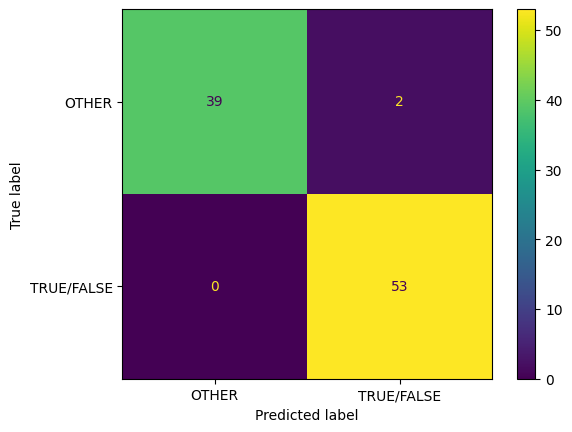

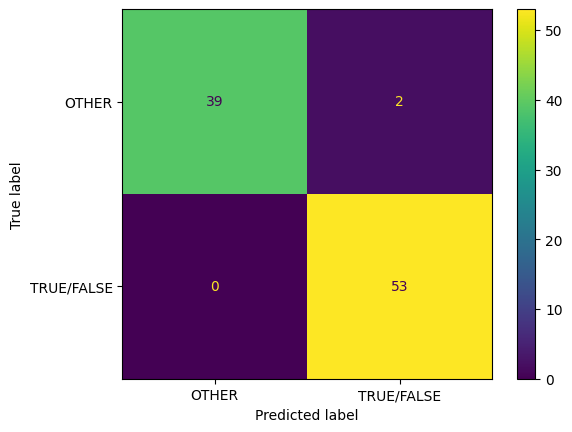

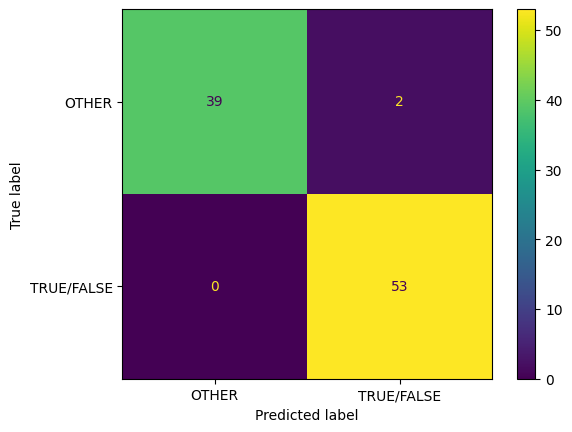

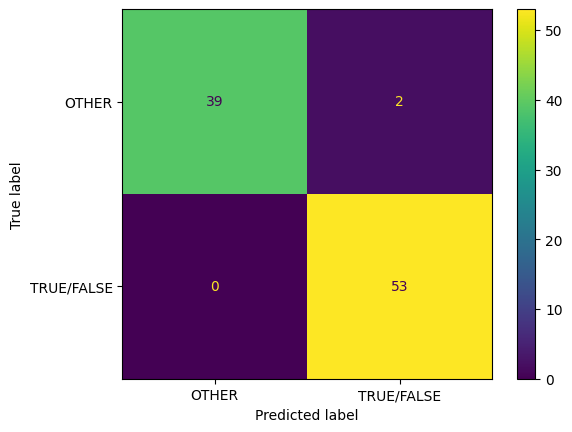

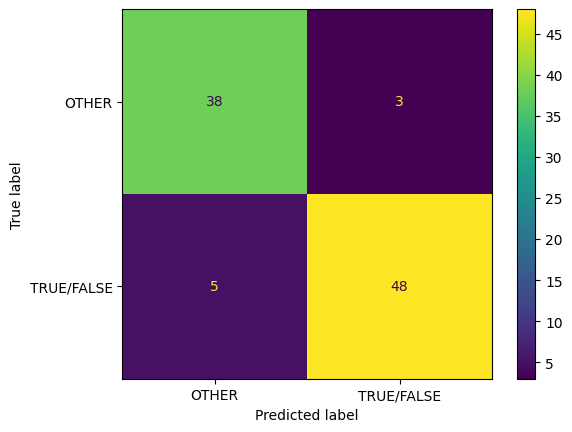

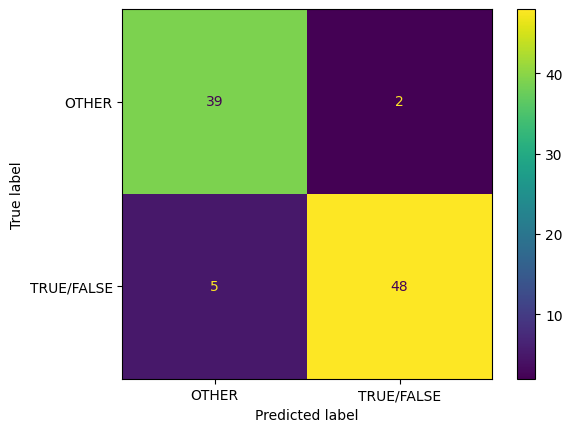

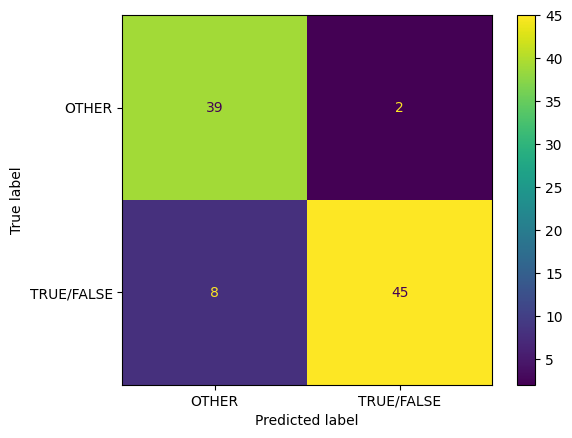

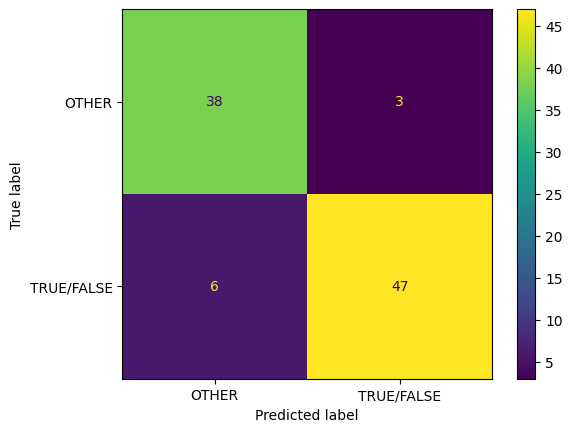

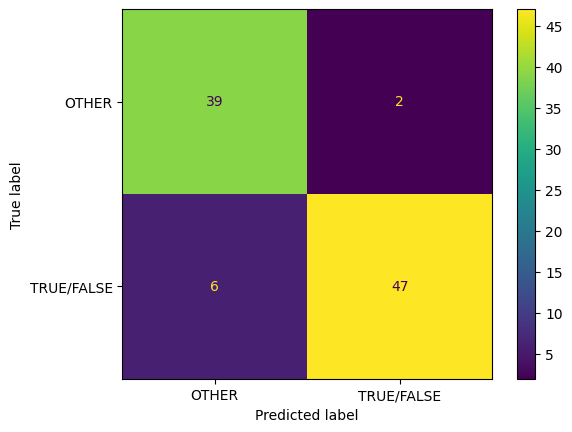

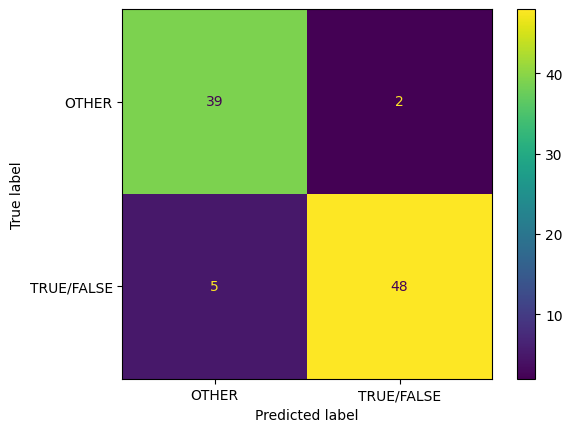

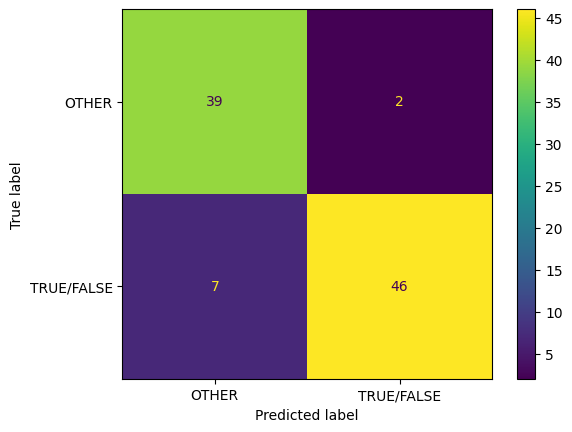

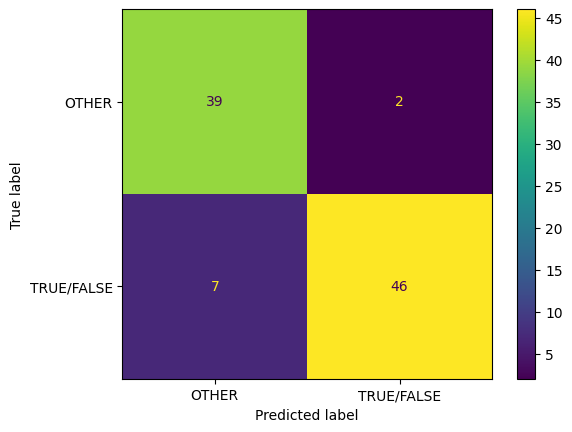

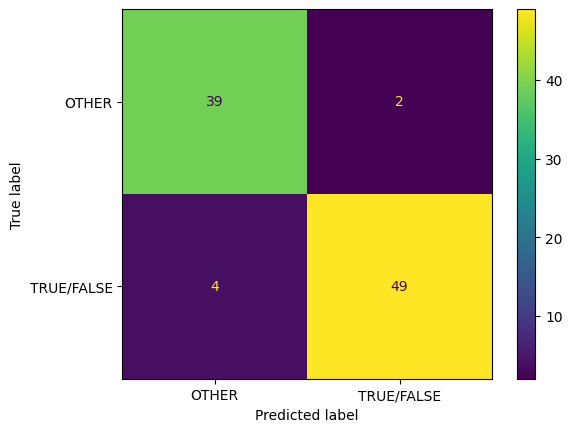

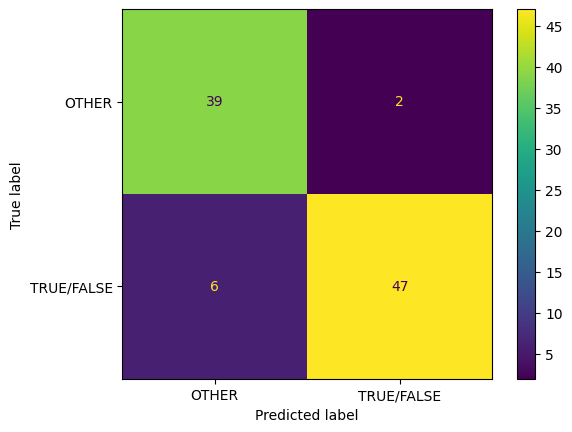

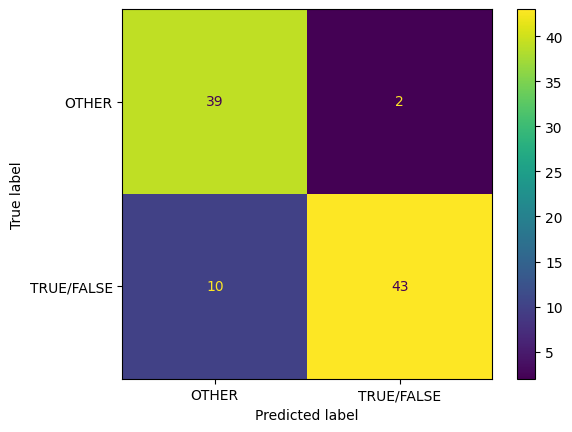

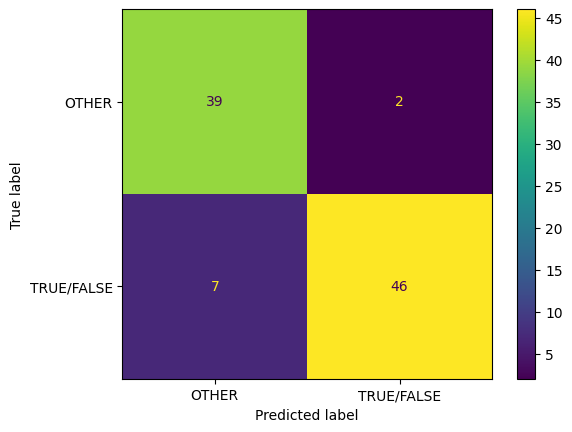

In [ ]:
np.random.seed(42)  # Set the random seed for NumPy

# le plus simple est de faire un test sur differents pipelines.  
# pipeline de l'utilisation de CountVectorizer sur le texte avec differents pre-traitements
CV_brut = Pipeline([('cleaner', TextNormalizer()), 
                    ('count_vectorizer', CountVectorizer(lowercase=False))])
CV_lowcase = Pipeline([('cleaner', TextNormalizer(removestopwords=False,lowercase=True,
                                               getstemmer=False,removedigit=False)), 
                    ('count_vectorizer', CountVectorizer(lowercase=False))])
CV_lowStop = Pipeline([('cleaner', TextNormalizer(removestopwords=True,lowercase=True,
                                               getstemmer=False,removedigit=False)), 
                    ('count_vectorizer', CountVectorizer(lowercase=False))])

CV_lowStopstem = Pipeline([('cleaner', TextNormalizer(removestopwords=True,lowercase=True,
                                               getstemmer=True,removedigit=False)), 
                    ('count_vectorizer', CountVectorizer(lowercase=False))])

# pipeline de l'utilisation de TfidfVectorizer avec differents pre-traitements
TFIDF_brut = Pipeline ([('cleaner', TextNormalizer()), 
                    ('tfidf_vectorizer', TfidfVectorizer(lowercase=False))])

TFIDF_lowcase = Pipeline([('cleaner', TextNormalizer(removestopwords=False,lowercase=True,
                                               getstemmer=False,removedigit=False)), 
                    ('tfidf_vectorizer', TfidfVectorizer(lowercase=False))])
TFIDF_lowStop = Pipeline([('cleaner', TextNormalizer(removestopwords=True,lowercase=True,
                                               getstemmer=False,removedigit=False)), 
                    ('tfidf_vectorizer', TfidfVectorizer(lowercase=False))])

TFIDF_lowStopstem = Pipeline([('cleaner', TextNormalizer(removestopwords=True,lowercase=True,
                                               getstemmer=True,removedigit=False)), 
                    ('tfidf_vectorizer', TfidfVectorizer(lowercase=False))])


# Liste de tous les modeles à tester
all_models = [
    ("CV_brut", CV_brut),
    ("CV_lowcase", CV_lowcase),
    ("CV_lowStop", CV_lowStop),
    ("CV_lowStopstem",CV_lowStopstem),
    ("TFIDF_lowcase", TFIDF_lowcase),
    ("TFIDF_lowStop", TFIDF_lowStop),
    ("TFIDF_lowStopstem",TFIDF_lowStopstem),
    ("TFIDF_brut", TFIDF_brut)
]

X_train_text_title_SVC = []
X_test_text_title_SVC = []

X_train_text_title_RandomForestClassifier = []
X_test_text_title_RandomForestClassifier = []


for name, pipeline in all_models :
    X_train_text_title_SVC.append(pipeline.fit_transform(X_train_text_title).toarray())
    X_test_text_title_SVC.append(pipeline.transform(X_test_text_title).toarray())
    X_train_text_title_RandomForestClassifier.append(pipeline.fit_transform(X_train_text_title).toarray())
    X_test_text_title_RandomForestClassifier.append(pipeline.transform(X_test_text_title).toarray())


models = {
    'SVC': SVC(random_state=42),
    'RandomForestClassifier': RandomForestClassifier(random_state=42)
}
    

params = {'SVC': [{'C': [0.001, 0.01, 0.1, 1,2,5,7,10]},
             {'gamma': [0.001, 0.01, 0.1,0.2,0.3,0.5,0.7,1]},
             {'kernel': ['linear', 'rbf']}],
    'RandomForestClassifier': [{'n_estimators': [10, 50, 100, 200, 300]},
                              {'max_features': ['auto', 'sqrt', 'log2']}]
}

for model_name, model in models.items():
    score='accuracy'
    X_train_text_title = eval('X_train_text_title_' + model_name)
    X_test_text_title = eval('X_test_text_title_' + model_name)
    for i in range (len(X_train_text_title)):
      grid_search = GridSearchCV(model, params[model_name], n_jobs=-1,  verbose=1,scoring=score)
      print("grid search fait")
      grid_search.fit(X_train_text_title[i],y_train)
      print ('meilleur score %0.3f'%(grid_search.best_score_),'\n')
      print ('meilleur estimateur',grid_search.best_estimator_,'\n')
      y_pred = grid_search.predict(X_test_text_title[i])
      MyshowAllScores(y_test,y_pred)
      
      print("Ensemble des meilleurs paramètres :")
      best_parameters = grid_search.best_estimator_.get_params()
      for param_dict in params[model_name]:
        for param_name, param_value in param_dict.items():
            print("\t%s: %r" % (param_name, best_parameters[param_name]))